The red wine industry has experienced a remarkable boom recently, fueled by the rising trend of social drinking. To stand out in the competitive market, producers often seek quality certifications for their products. These certifications typically require evaluations by human experts, which is not only expensive but also time-consuming. Additionally, the pricing of red wine largely depends on subjective assessments by tasters, whose opinions can vary greatly due to the abstract nature of wine appreciation.

Beyond sensory evaluations, red wine quality is also determined through physicochemical tests in laboratories, which measure attributes such as acidity, pH level, sugar content, and other chemical properties. Establishing a link between these chemical characteristics and the quality assessments made by human tasters could revolutionize the red wine market. This study aims to create a predictive model that can forecast the quality of new red wines based on their chemical profiles.

# Exploratory Data Analysis

In [1]:
import pandas as pd

data = pd.read_csv("WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
data.shape

(1143, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<Axes: >

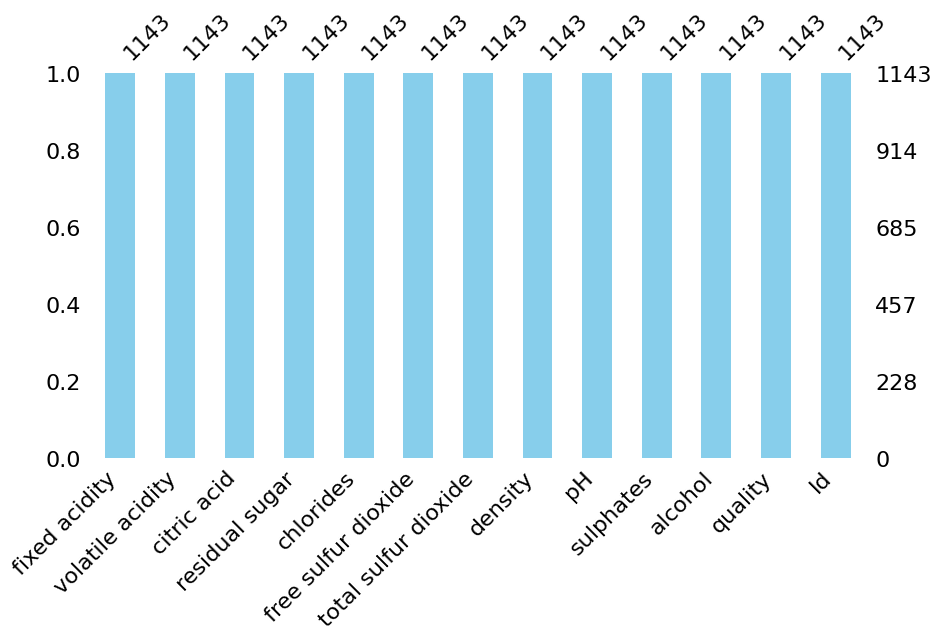

In [4]:
from missingno import bar

bar(data, figsize=(10, 5), color='skyblue')

As the dataset contains 1143 values, so we can clearly see above that the data contains no missing values.

In [5]:
data = data.drop('Id', axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
labels = {'fixed acidity':'fixed acid.', 'volatile acidity':'vola. acid.', 'free sulfur dioxide': 'free SO₂', 'total sulfur dioxide':'total SO₂', 'residual sugar':'res. sugar'}
colors = ["#F60000", "#FF8C00", "#FFEE00", "#4DE94C", "#3783FF", "#4815AA"]

In [7]:
from plotly.express import parallel_coordinates

fig = parallel_coordinates(data, color = "quality", labels = labels, color_continuous_scale=colors)
fig.show()

In above plot, each row of a data frame is represented by a polyline that crosses a set of parallel axes, one for each dimension.

Now, let's get an overivew of the values and their distribution.

In [8]:
with pd.option_context('display.precision', 2):
    explore = data.describe().T.style.background_gradient(cmap='Reds')
explore

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [9]:
corr = data.corr().round(1)
X = [i for i in data.columns]

colorscale = [[0.0, '#3f7f93'],  [0.071, '#5890a1'], [0.143, '#72a1b0'], [0.214, '#8cb3bf'], [0.286, '#a7c5cf'], [0.357, '#c0d6dd'],
                  [0.429, '#dae8ec'], [0.5, '#f2f2f2'], [0.571, '#f7d7d9'], [0.643, '#f2bcc0'], [0.714, '#eda3a9'], [0.786, '#e8888f'],
                  [0.857, '#e36e76'], [0.929, '#de535e'], [1.0, '#d93a46']]

In [10]:
from plotly import graph_objects

heat = graph_objects.Heatmap(z=corr, x=X, y=X, xgap=1, ygap=1,
                  colorscale=colorscale, colorbar_thickness=20,
                  colorbar_ticklen=3,)

layout = graph_objects.Layout(title_text='Correlation Matrix', title_x=0.5,
                   width=600, height=600,  xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')

fig = graph_objects.Figure(data=[heat], layout=layout)        
fig.show()

Now, let's visualize the distrubution of the data using Boxplots.

In [11]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = len(data.columns)//2)

for i, var in enumerate(data.columns):
    fig.add_trace(graph_objects.Box(y = data[var], name = var), row = i%2+1, col = i//2+1)

fig.update_traces(boxpoints = 'all', jitter = 0.3)
fig.update_layout(height = 1000, showlegend = False)
fig.show()

In [12]:
from plotly.express import scatter_matrix

fig = scatter_matrix(data_frame = data, color = "quality", height = 1200, labels = labels)
fig.show()

Now, let's visualize the spread of data on the specified variables.

In [13]:
from plotly.figure_factory import create_distplot

fig = make_subplots(rows = 4, cols = 3, subplot_titles = data.columns)

for j, i in enumerate(data.columns):
    fig2 = create_distplot([data[i].values], [i])
    fig2.data[0].autobinx = True
    fig.add_trace(graph_objects.Histogram(fig2['data'][0], marker_color='#f94449'), row=j//3 + 1, col=j%3 + 1)
    fig.add_trace(graph_objects.Scatter(fig2['data'][1], marker_color='#de0a26'), row=j//3 + 1, col=j%3 + 1)

fig.update_layout(height=1200, showlegend=False, margin={"l": 0, "r": 0, "t": 20, "b": 0})
fig.show()

Now, let's visualize the distribution of the target variables.

In [14]:
colors = ['#FC4F4F', '#FFBC80', '#FF9F45', '#F76E11', '#CD104D', '#820000']
quality = [3,4,5,6,7,8]

In [15]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "bar"}]])

fig.add_trace(graph_objects.Pie(values = data.quality.value_counts(),
                                labels = data.quality.value_counts().index,
                                domain = dict(x=[0, 0.5]), 
                                marker = dict(colors = colors), hole = .3,
                                name=''), row = 1, col = 1)

fig.add_trace(graph_objects.Bar(x = data.quality.value_counts().index,
              y = data.quality.value_counts(), name='',
              marker = dict(color = quality,
                     colorscale = colors)), row = 1, col = 2)
                     
fig.update_layout(showlegend = False)
fig.show()

Now, let's create plots to show weightage of different quality values with respect to the variable.

In [16]:
from plotly.express import box

fig = make_subplots(rows=4, cols=3, subplot_titles=[c for c in data.columns[:-1]])
for i,v in enumerate(data.columns[:-1]):
    for t in box(data, y=v, x="quality", color="quality").data:
        fig.add_trace(t, row=(i//3)+1, col=(i%3)+1)
fig.update_layout(height=1400, showlegend=False, margin={"l": 0, "r": 0, "t": 20, "b": 0})
fig.show()

In [17]:
from plotly.express import bar

skewness = data.skew().sort_values(ascending=True)
fig = bar(x=skewness, y=skewness.index, color=skewness.index, labels={'x': 'Skewness', 'y':'Descriptors'})
fig.update_layout(showlegend=False)
fig.add_vline(x=1, line_dash="dash", line_color="red")
fig.show()

Now, let's fix the class imbalance.

Since, we noticed that the classes are unbalanced from the EDA we have to balanced them before applying machine learning model.

In [18]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

features, labels = oversample.fit_resample(data.drop('quality', axis=1), data.quality)
scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846


In [19]:
normalized_arr = preprocessing.normalize(scaled_data)
normalized_data = pd.DataFrame(normalized_arr, columns=features.columns)
normalized_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247821,0.397313,0.000000,0.068502,0.106859,0.149274,0.098953,0.567623,0.606380,0.137743,0.153867
1,0.279605,0.513966,0.000000,0.114966,0.141757,0.353679,0.212822,0.487878,0.357625,0.206931,0.212661
2,0.301354,0.466480,0.042566,0.102042,0.142124,0.222361,0.180493,0.541454,0.435718,0.203910,0.229203
3,0.513628,0.096372,0.492461,0.060232,0.092491,0.210005,0.167800,0.512011,0.290823,0.131646,0.189408
4,0.247821,0.397313,0.000000,0.068502,0.106859,0.149274,0.098953,0.567623,0.606380,0.137743,0.153867


In [20]:
from numpy import log

unskew_data = normalized_data.copy(deep=True)
unskew_data['residual sugar'] = unskew_data['residual sugar'].replace(0.0, 0.01).apply(log)
unskew_data['chlorides'] = unskew_data['chlorides'].replace(0.0, 0.01).apply(log)
unskew_data['total sulfur dioxide'] = unskew_data['total sulfur dioxide'].replace(0.0, 0.01).apply(log)
unskew_data['free sulfur dioxide'] = unskew_data['free sulfur dioxide'].replace(0.0, 0.01).apply(log)

# Modeling

We will try different machine learning classifiers to figure out which ones we should pick.

In [21]:
from pycaret.classification import setup, compare_models

S = setup(data = unskew_data, target = labels, verbose=True)

,Description,Value
0,Session id,5339
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(2898, 12)"
5,Transformed data shape,"(2898, 12)"
6,Transformed train set shape,"(2028, 12)"
7,Transformed test set shape,"(870, 12)"
8,Numeric features,11
9,Preprocess,True


In [22]:
best = compare_models(include = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'mlp', 'ridge', 'rf', 'qda', 'ada', 'gbc', 'lda', 
                                 'et', 'xgboost', 'lightgbm', 'catboost', 'dummy'], fold = 10, n_select=20)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:40:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8299,0.9706,0.8299,0.8252,0.8242,0.7959,0.7972,0.2980
catboost,CatBoost Classifier,0.8299,0.9669,0.8299,0.8228,0.8242,0.7958,0.7968,10.4620
et,Extra Trees Classifier,0.8284,0.9734,0.8284,0.8223,0.8228,0.7941,0.7951,0.1730
lightgbm,Light Gradient Boosting Machine,0.8230,0.9675,0.8230,0.8169,0.8177,0.7876,0.7885,1.2180
xgboost,Extreme Gradient Boosting,0.8180,0.9647,0.8180,0.8105,0.8122,0.7816,0.7825,0.3770
gbc,Gradient Boosting Classifier,0.7751,0.0000,0.7751,0.7666,0.7675,0.7302,0.7315,2.2120
dt,Decision Tree Classifier,0.7406,0.8444,0.7406,0.7342,0.7351,0.6888,0.6897,0.0290
knn,K Neighbors Classifier,0.7318,0.9092,0.7318,0.7154,0.6994,0.6781,0.6864,0.0490
qda,Quadratic Discriminant Analysis,0.7283,0.0000,0.7283,0.7228,0.7216,0.6739,0.6757,0.0270
mlp,MLP Classifier,0.6928,0.9141,0.6928,0.6774,0.6802,0.6313,0.6332,1.8500


Only taking the models with accuracy greater than 80%. And doing hyper-parameter tuning manually to improve accuracy. Then a confusion matrix to show the errors.

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(unskew_data, labels, test_size=0.33, random_state=673)
y_train2, y_test2 = le.fit_transform(y_train), le.fit_transform(y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 1941, number of used features: 11
[LightGBM] [Info] Start training from score -1.818386
[LightGBM] [Info] Start training from score -1.867176
[LightGBM] [Info] Start training from score -1.753847
[LightGBM] [Info] Start training from score -1.762816
[LightGBM] [Info] Start training from score -1.759818
[LightGBM] [Info] Start training from score -1.793306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


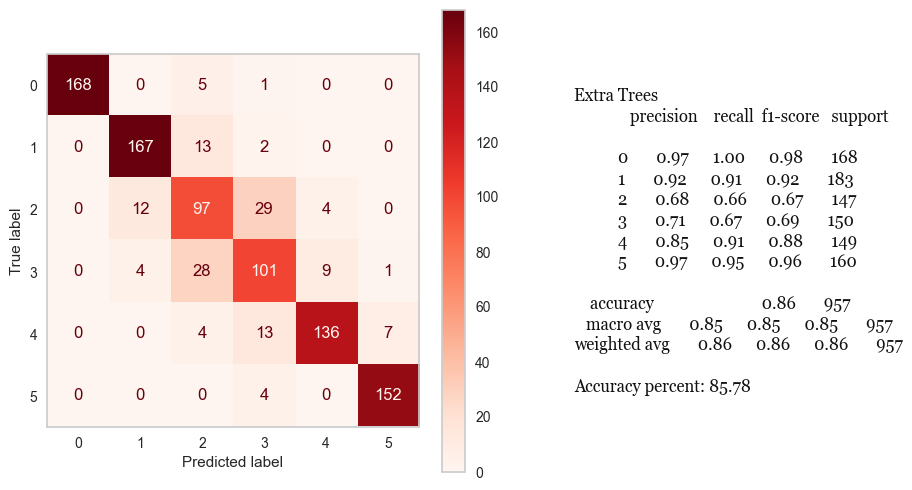

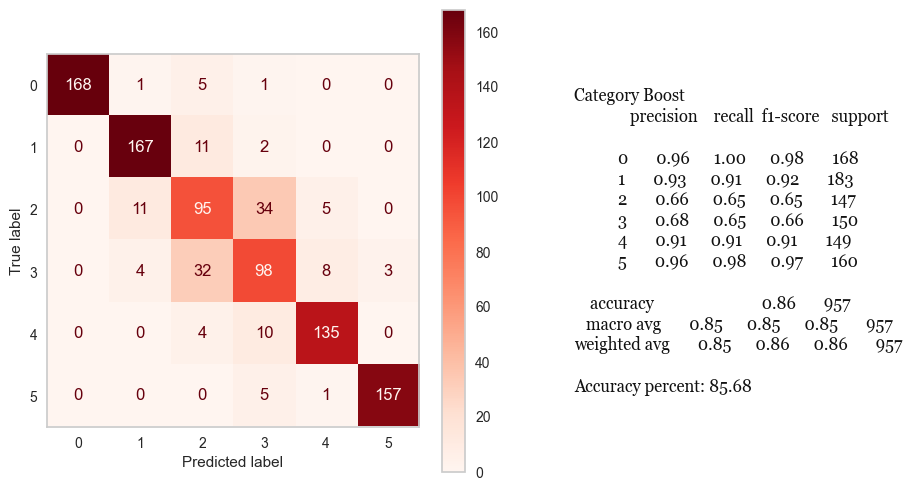

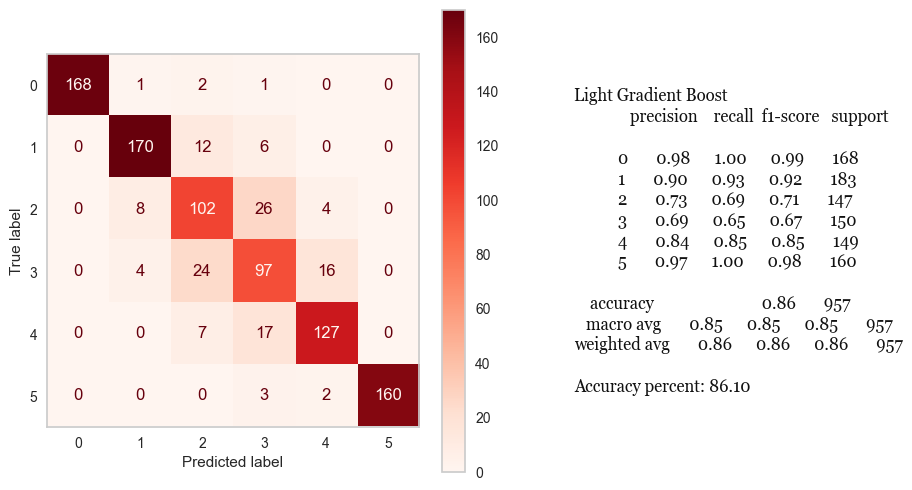

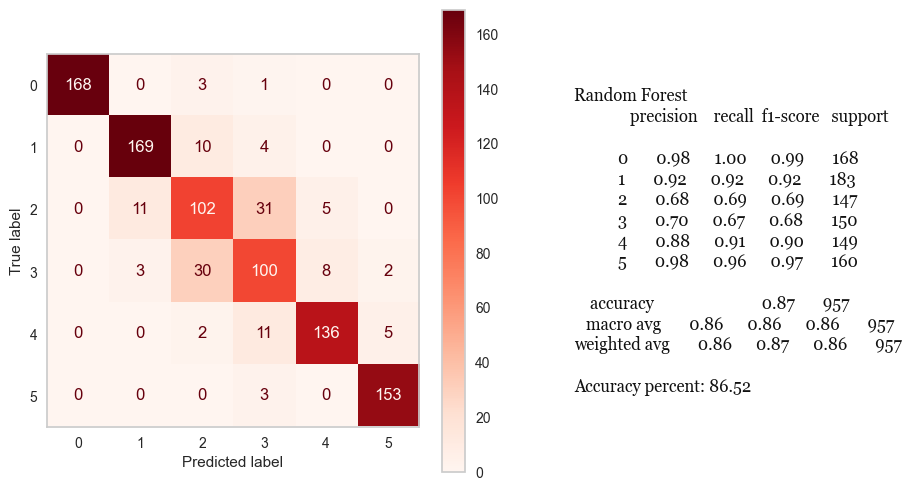

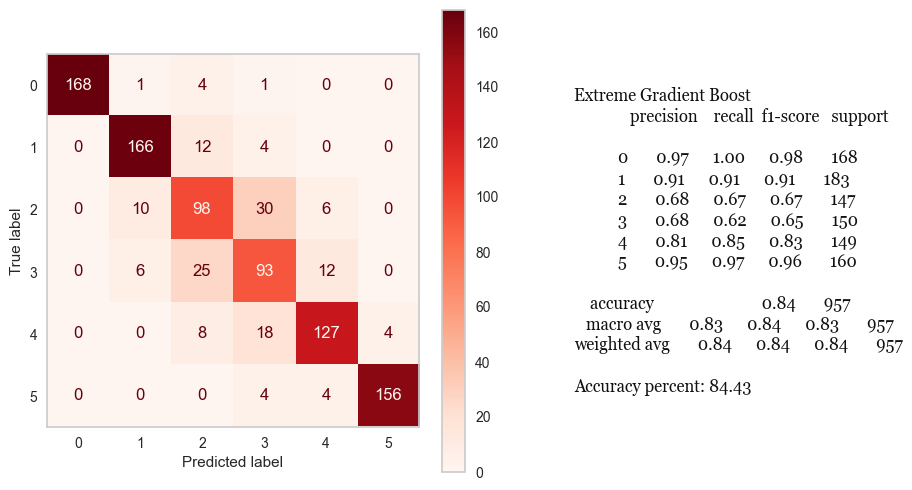

In [31]:
from IPython.display import Markdown, display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import subplots, text
%matplotlib inline

models = [ExtraTreesClassifier(n_estimators=900, random_state=10),
          CatBoostClassifier(silent=True, depth=7, random_state=11),
          LGBMClassifier(random_state=12),
          RandomForestClassifier(n_estimators=1000, bootstrap=False, class_weight="balanced", random_state=247),
          XGBClassifier(max_depth=5, subsample=0.7, colsample_bytree=0.8, random_state=149)]

model_name = ['Extra Trees', 'Category Boost', 'Light Gradient Boost', 'Random Forest', 'Extreme Gradient Boost']

for i, j in zip(models, model_name):
    if j[0] == "E":
        y_train = y_train2
        y_test = y_test2
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    cm = confusion_matrix(y_pred, y_test, labels = i.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=i.classes_)
    fig, ax = subplots(figsize=(6, 6))
    ax.grid(False)
    ax.grid(False)
    disp.plot(cmap='Reds', ax=ax)
    text(8, 5,  j + '\n' + classification_report(y_test,y_pred, zero_division=1) + '\n' + "Accuracy percent: " + 
        str(accuracy_score(y_pred, y_test)*100)[:5], fontsize=12, fontfamily='Georgia', color='k',ha='left', va='bottom')
